### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

### Import Dataset

In [2]:
df_salary = pd.read_csv('salary_data.csv')
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df_salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


### Exploratory Data Analysis

In [4]:
df_salary.shape

(30, 2)

In [5]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

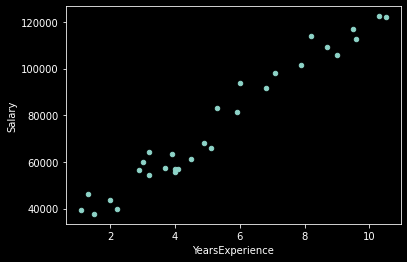

In [6]:
df_salary.plot.scatter(x='YearsExperience', y='Salary')

In [7]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Splitting the data

In [8]:
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
train_data, test_data = train_test_split(df_salary, test_size=0.2, random_state=12)

In [10]:
print(f'Total train data: {train_data.shape[0]}')
print(f'Total test data: {test_data.shape[0]}')

Total train data: 24
Total test data: 6


### Prepare Data

In [11]:
# Train Data
train_label = train_data['Salary']
train_feature = train_data.drop(['Salary'], axis=1)

# Test Data
test_label = test_data['Salary']
test_feature = test_data.drop(['Salary'], axis=1)

### Train the model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X=train_feature, y=train_label)

LinearRegression()

### Test the model

In [15]:
from sklearn.metrics import r2_score

In [16]:
accuracy_score = lr_model.score(X=test_feature, y=test_label)

In [17]:
print('Accuracy: {}'.format(accuracy_score * 100))

Accuracy: 94.29269163491423


In [18]:
salary_pred = lr_model.predict(test_feature)

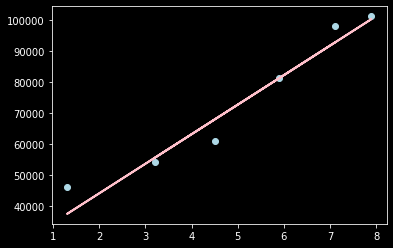

In [19]:
plt.scatter(test_data['YearsExperience'], test_data['Salary'], color='lightblue')
plt.plot(test_data['YearsExperience'], salary_pred, color='pink', linewidth=2)
plt.show()

In [20]:
test_feature['YearsExperience']

7     3.2
22    7.9
18    5.9
14    4.5
1     1.3
21    7.1
Name: YearsExperience, dtype: float64

In [21]:
salary_pred

array([ 55675.5913984 , 100372.57413579,  81352.58148158,  68038.58662364,
        37606.59837691,  92764.5770741 ])

In [22]:
print('Coefficient: ', lr_model.coef_[0])
print('Intercept: ', lr_model.intercept_)

Coefficient:  9509.996327102475
Intercept:  25243.603151676223


### Linear Regression Formula

In [23]:
y = 9509.996327102475 * 3.2 + 25243.603151676223
y

55675.59139840415